#### **Libraries**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from termcolor import colored, cprint

#### **Datasets and Analytics**

In [37]:
data2 = pd.read_csv(r'C:\Users\AleynaCihangir\Desktop\MarketPlace PowerBrands Projects\00_Literature\dataset_2.csv')
print(colored('Datasets Shape: ','blue'), data2.shape)

Datasets Shape:  (50000, 109)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(data2.drop(labels=['target'], axis=1),  
                                                    data2['target'],  
                                                    test_size=0.3,
                                                    random_state=0)
print(colored('Shape for X train and X test:', 'blue'), X_train.shape, X_test.shape) 

Shape for X train and X test: (35000, 108) (15000, 108)


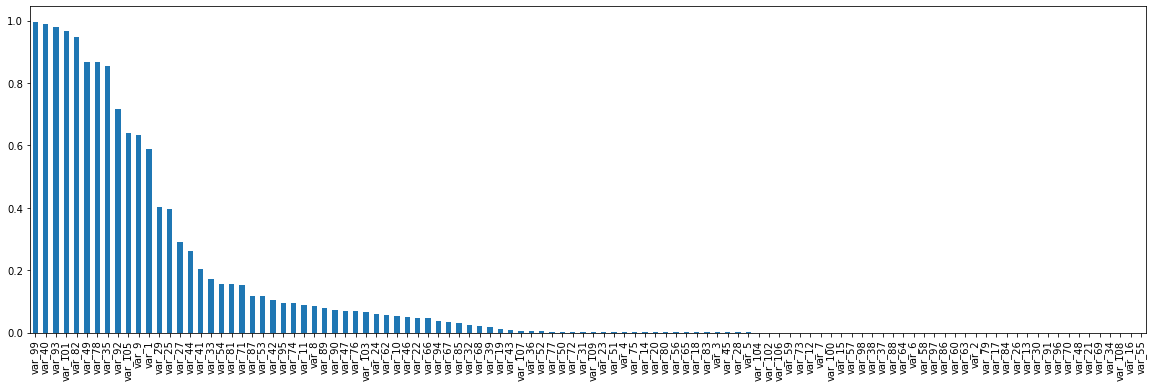

In [39]:
univariate = f_classif(X_train, y_train)
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 6));

In [40]:
sel_ = SelectKBest(f_classif, k=10).fit(X_train, y_train)
print(colored(X_train.columns[sel_.get_support()], 'red'))
X_train = sel_.transform(X_train)
print(colored('Shape for X train:', 'blue'), X_train.shape) 

Index(['var_16', 'var_21', 'var_34', 'var_48', 'var_55', 'var_69', 'var_70',
       'var_91', 'var_96', 'var_108'],
      dtype='object')
Shape for X train: (35000, 10)


In [15]:
X_train['var_2'].value_counts() / np.float(len(X_train))

C:\Users\AleynaCihangir\AppData\Local\Temp\ipykernel_6048\662793233.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train['var_2'].value_counts() / np.float(len(X_train))


0    0.999971
1    0.000029
Name: var_2, dtype: float64

In [16]:
feat_names = X_train.columns[sel.get_support()]
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
print(colored('Shape for X train and X test:', 'blue'), X_train.shape, X_test.shape) 
X_train = pd.DataFrame(X_train, columns=feat_names)
X_test = pd.DataFrame(X_test, columns=feat_names)

Shape for X train and X test: (35000, 215) (15000, 215)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    data1.drop(labels=['target'], axis=1),
    data1['target'],
    test_size=0.3,
    random_state=0)
constant_features = [feat for feat in X_train.columns if X_train[feat].std() == 0]
X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)
print(colored('Shape for X train and X test:', 'blue'), X_train.shape, X_test.shape) 

Shape for X train and X test: (35000, 266) (15000, 266)


In [19]:
quasi_constant_feat = []
for feature in X_train.columns:
    predominant = X_train[feature].value_counts(normalize=True).sort_values(ascending=False).values[0]
    if predominant > 0.998:
        quasi_constant_feat.append(feature)
print(colored('Length of Constants Features:', 'blue'), len(quasi_constant_feat)) 

Length of Constants Features: 108


In [20]:
X_train['var_3'].value_counts(normalize=True)
X_train.drop(labels=quasi_constant_feat, axis=1, inplace=True)
X_test.drop(labels=quasi_constant_feat, axis=1, inplace=True)
print(colored('Shape for X train and X test:', 'blue'), X_train.shape, X_test.shape) 

Shape for X train and X test: (35000, 158) (15000, 158)


Shape for X train and X test: (35000, 108) (15000, 108)


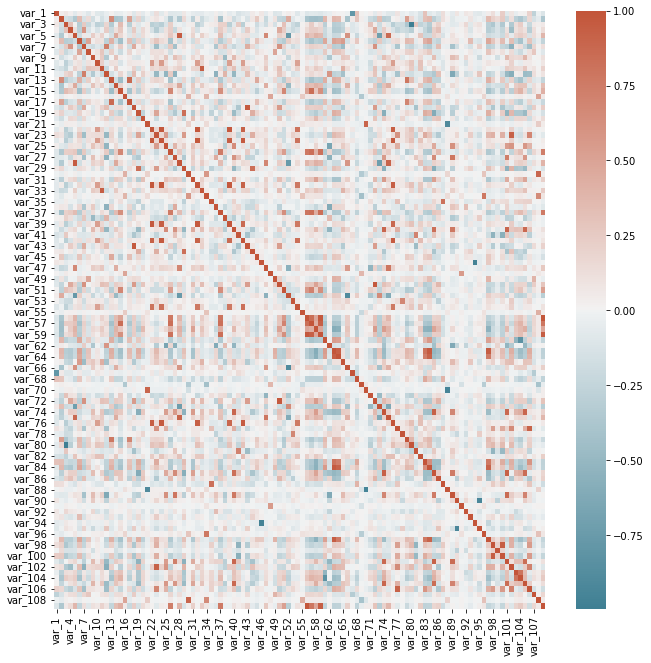

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(labels=['target'], axis=1),
    data2['target'],
    test_size=0.3,
    random_state=0)

print(colored('Shape for X train and X test:', 'blue'),X_train.shape, X_test.shape)
corrmat = X_train.corr(method='pearson')
cmap = sns.diverging_palette(220, 20, as_cmap=True)
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat, cmap=cmap);

var_5:  1.0
var_28:  0.9536721652384935
var_75:  0.8616179292025201


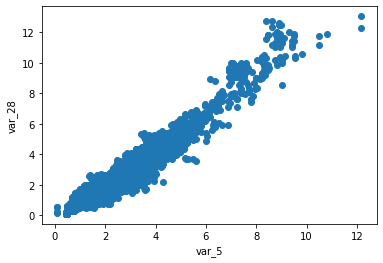

In [51]:
c = 0
for i in corrmat.loc['var_5']:
    if i>0.8:
        print(colored(corrmat.columns[c] + ': ','blue'), i)      
    c = c +1
plt.scatter(X_train['var_5'], X_train['var_28'])
plt.ylabel('var_28')
plt.xlabel('var_5')
plt.show()

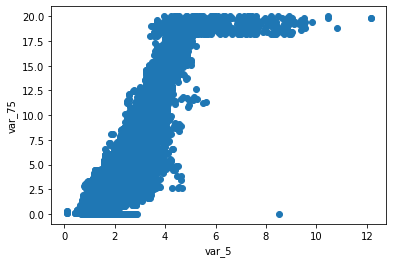

In [52]:
plt.scatter(X_train['var_5'], X_train['var_75'])
plt.ylabel('var_75')
plt.xlabel('var_5')
plt.show()

var_21:  -0.8943929785046758
var_70:  -0.9489465365954278


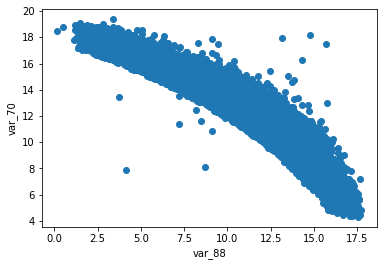

In [54]:
c = 0
for i in corrmat.loc['var_88']:
    if i<-0.8:
        print(colored(corrmat.columns[c] + ': ','blue'), i)     
    c = c +1
plt.scatter(X_train['var_88'], X_train['var_70'])
plt.ylabel('var_70')
plt.xlabel('var_88')
plt.show()

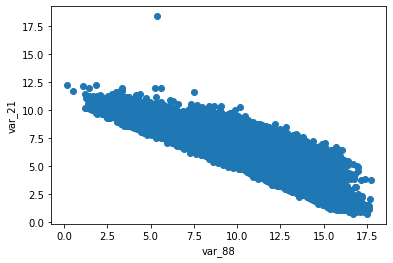

In [55]:
plt.scatter(X_train['var_88'], X_train['var_21'])
plt.ylabel('var_21')
plt.xlabel('var_88')
plt.show()

In [57]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

0.8632980418993791 var_17 var_13
0.9813409653986921 var_24 var_22
0.9536721652384935 var_28 var_5
0.8341792843814466 var_29 var_19
0.990430734999363 var_32 var_22
0.9804113632495293 var_32 var_24
0.9443605986205844 var_33 var_11
0.9744609333741678 var_39 var_22
0.9431153866790611 var_39 var_24
0.9748779191363224 var_39 var_32
0.91910579117498 var_42 var_22
0.9672922649953389 var_42 var_24
0.9199183443060952 var_42 var_32
0.8567453370818933 var_42 var_39
0.9654741987814475 var_43 var_18
0.8358214281472581 var_44 var_29
0.8150241475398633 var_54 var_24
0.8287090109274785 var_54 var_42
0.837404481636077 var_57 var_15
0.8318090759398273 var_57 var_26
0.8207993837973238 var_57 var_37
0.8440857367712562 var_57 var_56
0.8131947525226287 var_59 var_26
0.8306144274586774 var_59 var_37
0.9757443944210573 var_59 var_56
0.9223172758595293 var_59 var_57
0.9244600573582408 var_64 var_63
0.8925221926487203 var_66 var_52
0.895397163737887 var_70 var_21
0.9702627369945973 var_72 var_50
0.88311916559035

40

In [58]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
print(colored('Shape for X train and X test:', 'blue'), X_train.shape, X_test.shape) 

Shape for X train and X test: (35000, 68) (15000, 68)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(labels=['target'], axis=1),
    data2['target'],
    test_size=0.3,
    random_state=0)
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,var_80,var_3,0.994923
1,var_3,var_80,0.994923
2,var_32,var_22,0.990431
3,var_22,var_32,0.990431
4,var_56,var_109,0.987777


In [64]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]
        correlated_groups.append(correlated_block)    
print(colored('found {} correlated groups'.format(len(correlated_groups)), 'blue'))
print(colored('out of {} total features'.format(X_train.shape[1]), 'red'))

found 27 correlated groups
out of 108 total features


In [65]:
for group in correlated_groups:
    print(group)
    print()

  feature1 feature2      corr
0   var_80    var_3  0.994923

   feature1 feature2      corr
2    var_32   var_22  0.990431
8    var_32   var_24  0.980411
13   var_32   var_39  0.974878
47   var_32   var_76  0.931718
56   var_32   var_42  0.919918

    feature1 feature2      corr
4     var_56  var_109  0.987777
11    var_56   var_59  0.975744
103   var_56   var_57  0.844086

   feature1 feature2      corr
16   var_72   var_50  0.970263

   feature1 feature2      corr
18   var_94   var_46  0.967895

   feature1 feature2      corr
22   var_43   var_18  0.965474

   feature1 feature2      corr
26   var_63   var_84  0.959138
40   var_63   var_97  0.940184
53   var_63   var_64  0.924460

   feature1 feature2      corr
30   var_28    var_5  0.953672
67   var_28   var_75  0.904413

   feature1 feature2      corr
32   var_88   var_70  0.948947
75   var_88   var_21  0.894393

   feature1 feature2      corr
36   var_11   var_33  0.944361

   feature1 feature2      corr
42   var_98  var_100  0.938

In [69]:
group = correlated_groups[1]
features = list(group['feature2'].unique())+['var_32']
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
print(colored(rf.fit(X_train[features].fillna(0), y_train), 'magenta'))

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=39)


In [70]:
importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)
importance.columns = ['feature', 'importance']
importance.sort_values(by='importance', ascending=False)

,feature,importance
2,var_39,0.194210
3,var_76,0.187360
0,var_22,0.167467
1,var_24,0.167054
4,var_42,0.147102
5,var_32,0.136807


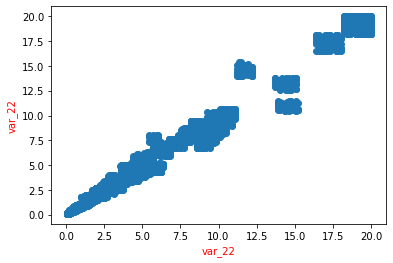

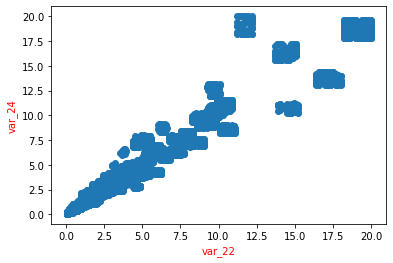

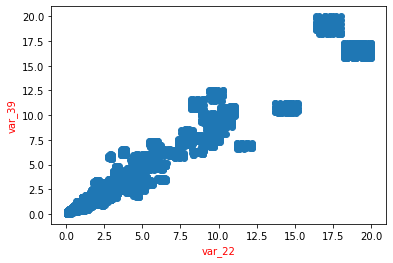

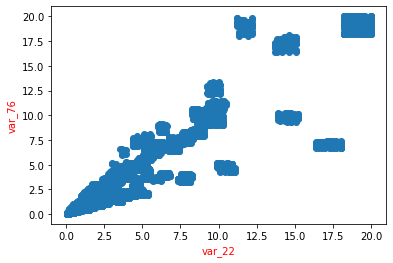

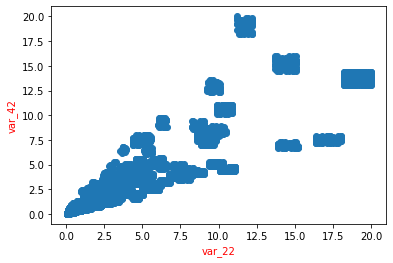

In [77]:
for feature in group['feature2']:
    plt.scatter(X_train['var_32'], X_train[feature])
    plt.xlabel('var_22', fontsize=10, color='r')
    plt.ylabel(feature, fontsize=10, color='r')
    plt.show()